## Cleaning Data in Python

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Task 1 : Loading and Inspecting the Data

In [3]:
# load the audible_raw.csv file
audible = pd.read_csv('data/audible_raw.csv')

# View the first raws of the dataframe
audible

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [4]:
# Inspect the column's data types
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


### Task 2 : Cleaning the text data in Author and Narrator Columns

In [5]:
# Remove Writtenby: from author column
audible['author'] = audible['author'].str.replace('Writtenby:', '')

# Remove Narratedby: from narrator column
audible['narrator'] = audible['narrator'].str.replace('Narratedby:', '')

# Check the results
audible.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


### Task 3 : Extract Number of stars and ratings from Stars column

In [6]:
# Get a glimpse of the stars column
audible.stars.sample(n=10)

25815    Not rated yet
35323    Not rated yet
83182    Not rated yet
26792    Not rated yet
53422    Not rated yet
74472    Not rated yet
84322    Not rated yet
318      Not rated yet
40838    Not rated yet
6320     Not rated yet
Name: stars, dtype: object

In [7]:
# Explore the values of the stars column that not "Not rated yet"
audible[audible.stars != "Not rated yet"].stars.sample(n=10)

68692        5 out of 5 stars1 rating
64343        5 out of 5 stars1 rating
71972       5 out of 5 stars2 ratings
30940        5 out of 5 stars1 rating
34303        5 out of 5 stars1 rating
28129     4.5 out of 5 stars6 ratings
11328    4.5 out of 5 stars29 ratings
75554        4 out of 5 stars1 rating
4548       5 out of 5 stars12 ratings
64196        1 out of 5 stars1 rating
Name: stars, dtype: object

In [8]:
# Replace "Not rated yet" with Nan
audible.stars.replace("Not rated yet", np.nan, inplace=True)

In [9]:
# Extract number of stars into rating_stars and turn into float
audible['rating_stars'] = audible['stars'].str.extract('^([\d.]+)').astype(float)

# Remove commas, and Extacting number of ratings in n_ratings and turn into float
audible['n_ratings'] = audible['stars'].str.replace(',', '').str.extract('(\d+)(?=\s*ratings?$)').astype(float)

# Examine the new rating_stars and n_rating columns
audible[audible.stars.notna()][['rating_stars', 'n_ratings']].sample(n=10)


,rating_stars,n_ratings
52251,4.0,7.0
8477,5.0,1.0
47403,5.0,1.0
56734,1.0,1.0
31202,5.0,1.0
38248,5.0,2.0
32653,5.0,1.0
63742,2.0,2.0
7567,4.5,31.0
23593,5.0,1.0


In [10]:
# Drop stars column
audible.drop(columns=['stars'], axis=1, inplace=True)

# check the results
audible

,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181.0
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,596.00,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,820.00,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,938.00,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,680.00,NaN,NaN


### Task 4 : Change Data Types

In [11]:
audible.price.sample(n=10)

62986    1,254.00
56775      351.00
85072    1,005.00
84592      820.00
3567        33.00
25996      837.00
47237        Free
18728      501.00
37708      703.00
5812       500.00
Name: price, dtype: object

In [12]:
# Remove comma from price
audible['price'] = audible['price'].str.replace(',', '')

# Replace Free with 0
audible['price'] = audible['price'].str.replace('Free', '0')

# Turn price to float
audible['price']= audible['price'].astype(float)

In [13]:
# look at the unique values of the star_ratings column
audible.rating_stars.unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

In [14]:
# Turn rating_stars column into category
audible['rating_stars'] = audible['rating_stars'].astype('category')

In [15]:
# Convert releasedate to datetime
audible['releasedate'] = pd.to_datetime(audible.releasedate)

# Inspect the dataframe
audible.info()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3188\172458859.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  audible['releasedate'] = pd.to_datetime(audible.releasedate)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   n_ratings     15072 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB


### Task 5 : Extracting hours and minutes from the time column
The time column combines both hours and minutes into one column. We want to transfrom and consoidate the information into a new time_minutes column.

In [16]:
# Explore the values in the time column
audible.time.sample(n=10)

12143               36 mins
7524                15 mins
86637      1 hr and 17 mins
83483     8 hrs and 28 mins
80429    11 hrs and 53 mins
41238      1 hr and 38 mins
67337    17 hrs and 43 mins
71152     5 hrs and 36 mins
14111       1 hr and 6 mins
53563     3 hrs and 58 mins
Name: time, dtype: object

In [17]:
audible[audible.time.str.contains('minute')].time.sample(n=10)

1404     Less than 1 minute
87076    Less than 1 minute
7170     Less than 1 minute
87170    Less than 1 minute
87119    Less than 1 minute
10895    Less than 1 minute
1913     Less than 1 minute
55648    Less than 1 minute
87099    Less than 1 minute
87133    Less than 1 minute
Name: time, dtype: object

In [18]:
# Replace hrs, mins and "Less than 1 minute"
audible['time'] = audible.time.str.replace('hrs', 'hr')
audible['time'] = audible.time.str.replace('mins', 'min')
audible['time'] = audible.time.str.replace('Less than 1 minute', '1 min')

In [19]:
# check results
audible['time'].head(10)

0     2 hr and 20 min
1     13 hr and 8 min
2      2 hr and 3 min
3    11 hr and 16 min
4               10 hr
5    10 hr and 35 min
6     2 hr and 23 min
7    12 hr and 32 min
8    10 hr and 56 min
9    13 hr and 22 min
Name: time, dtype: object

In [20]:
# Extract the number of hours, turn into integer
hours = audible['time'].str.extract('(\d+) hr').fillna(0).astype(int)

# Extract the number of minutes, turn into itneger
mins = audible['time'].str.extract('(\d+) min').fillna(0).astype(int)

# Combines hours and minutes into time_minutes column
audible['time_minutes'] = hours * 60 + mins

# Check the resutls
audible['time_minutes'].head(10)

0    140
1    788
2    123
3    676
4    600
5    635
6    143
7    752
8    656
9    802
Name: time_minutes, dtype: int32

In [21]:
# Delete the time column
audible.drop(columns=['time'], axis=1, inplace=True)

In [22]:
audible.head()

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_minutes
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2008-04-08,English,468.0,5.0,34.0,140
1,The Burning Maze,RickRiordan,RobbieDaymond,2018-01-05,English,820.0,4.5,41.0,788
2,The Deep End,JeffKinney,DanRussell,2020-06-11,English,410.0,4.5,38.0,123
3,Daughter of the Deep,RickRiordan,SoneelaNankani,2021-05-10,English,615.0,4.5,12.0,676
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,2010-01-13,English,820.0,4.5,181.0,600


In [23]:
# Inspecting Dataframe
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   releasedate   87489 non-null  datetime64[ns]
 4   language      87489 non-null  object        
 5   price         87489 non-null  float64       
 6   rating_stars  15072 non-null  category      
 7   n_ratings     15072 non-null  float64       
 8   time_minutes  87489 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 5.1+ MB


### Task 6:  Check data ranges

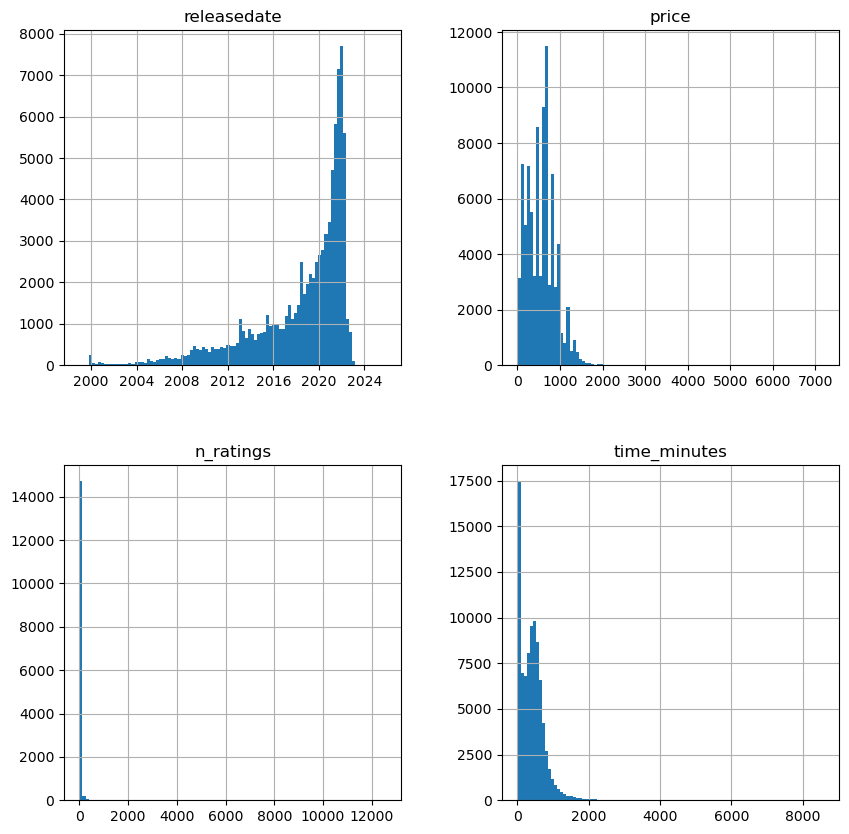

In [24]:
# plot histograms of all numeric columns
audible.hist(figsize=(10,10), bins=100)
plt.show()

In [25]:
# look at the numeric columns
audible.describe()

,releasedate,price,n_ratings,time_minutes
count,87489,87489.000000,15072.000000,87489.000000
mean,2018-06-22 01:35:29.780886528,559.009246,21.613190,417.497663
min,1998-12-27 00:00:00,0.000000,1.000000,1.000000
25%,2016-08-30 00:00:00,268.000000,1.000000,142.000000
50%,2020-01-30 00:00:00,585.000000,2.000000,386.000000
75%,2021-08-04 00:00:00,755.000000,7.000000,584.000000
max,2025-11-14 00:00:00,7198.000000,12573.000000,8595.000000
std,NaN,336.096642,207.479634,364.559399


In [27]:
# look at the non-numeric columns
audible.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars
count,87489,87489,87489,87489,87489,15072.0
unique,82767,48374,29717,NaN,36,9.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,NaN,English,5.0
freq,20,874,1034,NaN,61884,6761.0
mean,NaN,NaN,NaN,2018-06-22 01:35:29.780886528,NaN,NaN
min,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,2016-08-30 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,2020-01-30 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,2021-08-04 00:00:00,NaN,NaN
max,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN


In [29]:
# Transform prices to USD (multiply times 0.012)
audible['price'] = audible['price'] * 0.012

# Check the results
audible.price.describe()

count    87489.000000
mean         0.080497
std          0.048398
min          0.000000
25%          0.038592
50%          0.084240
75%          0.108720
max          1.036512
Name: price, dtype: float64

In [30]:
# Inspect the language column before making changes
audible.language.unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [44]:
# Update Capitalization in the language column
audible['language'] = audible.language.str.capitalize()

# Check the results
audible.language.unique()

array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', 'Lithuanian'], dtype=object)

### Task 7 : Checking for Duplicates

In [45]:
# Look for duplicate rows
audible.duplicated().sum()

0

In [56]:
# Create a list of our subset columns and assign to subset_cols
subset_cols = ['name', 'author', 'narrator', 'time_minutes', 'price']

# Check for duplicates using our subset of columns
audible.duplicated(subset=subset_cols).sum()

70

In [57]:
audible[audible.duplicated(subset=subset_cols, keep=False)].sort_values(by='name')

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_minutes
63978,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-14,German,0.033552,NaN,NaN,144
63965,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-23,German,0.033552,NaN,NaN,144
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2015-09-25,English,0.084384,NaN,NaN,495
24116,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2020-10-15,English,0.084384,NaN,NaN,495
16971,Adagio in Dm,BillBrown,BillBrown,2021-06-08,English,0.065664,NaN,NaN,78
...,...,...,...,...,...,...,...,...,...
18338,What I Talk About When I Talk About Running,HarukiMurakami,RayPorter,2016-07-07,English,0.057312,4.5,193.0,263
38021,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,0.120384,4.5,14.0,555
20260,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,0.120384,4.5,13.0,555
22158,Wings of Fire,"APJAbdulKalam,ArunTiwari",GirishKarnad,2020-01-04,English,0.010800,5.0,1823.0,75


In [59]:
# drop duplicate rows keeping the last release date
audible.drop_duplicates(subset=subset_cols, keep='last', inplace=True)

In [61]:
# Checking again for any duplicates using the subset_cols
audible.duplicated(subset=subset_cols).sum()

0

### Task 8 : Dealing with missing data

In [64]:
# Check for null values
audible.isna().sum()

name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_ratings       72387
time_minutes        0
dtype: int64

### Task 9 : Save the cleaned dataset

In [66]:
# Save the dataframe to a new file audible_clean.csv
audible.to_csv('data/audible_clean.csv', index=False)